# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


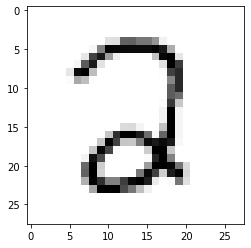

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.23703867383457458
train accuracy is: 0.7376064096144216, test accuracy is 0.7479838709677419


Epoch 10 Loss 0.06301268313642427
train accuracy is: 0.9353196461358705, test accuracy is 0.9475806451612904


Epoch 20 Loss 0.04445949318402634
train accuracy is: 0.9497579702887665, test accuracy is 0.9616935483870968


Epoch 30 Loss 0.037367150388229235
train accuracy is: 0.956685027541312, test accuracy is 0.9642137096774194


Epoch 40 Loss 0.03344211699997497
train accuracy is: 0.9618594558504423, test accuracy is 0.9667338709677419


Epoch 50 Loss 0.03082083106161682
train accuracy is: 0.9649474211316975, test accuracy is 0.9667338709677419


Epoch 60 Loss 0.028886054374594468
train accuracy is: 0.9677015523284928, test accuracy is 0.967741935483871


Epoch 70 Loss 0.02737392276785783
train accuracy is: 0.9692038057085628, test accuracy is 0.969758064516129


Epoch 80 Loss 0.026148206769430804
train accuracy is: 0.9705391420464029, test accuracy is 0.9682459677419355


Epoch 90 Loss 0.025118287947398597
train accuracy is: 0.971791019863128, test accuracy is 0.967741935483871


Epoch 100 Loss 0.024217585454681622
train accuracy is: 0.972375229510933, test accuracy is 0.9682459677419355


Epoch 110 Loss 0.023416264641794568
train accuracy is: 0.9728759806376232, test accuracy is 0.9692540322580645


Epoch 120 Loss 0.022696642036495695
train accuracy is: 0.9742947754965782, test accuracy is 0.969758064516129


Epoch 130 Loss 0.022049328065538668
train accuracy is: 0.9746286095810383, test accuracy is 0.9702620967741935


Epoch 140 Loss 0.02144581316087542
train accuracy is: 0.9755466533133033, test accuracy is 0.9717741935483871


Epoch 150 Loss 0.020883655850620308
train accuracy is: 0.9764646970455684, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.02036116694226263
train accuracy is: 0.9772992822567184, test accuracy is 0.9737903225806451


Epoch 170 Loss 0.01986864198064355
train accuracy is: 0.9777165748622935, test accuracy is 0.9737903225806451


Epoch 180 Loss 0.01940264214891451
train accuracy is: 0.9786346185945585, test accuracy is 0.9742943548387096


Epoch 190 Loss 0.018959188401336195
train accuracy is: 0.9792188282423635, test accuracy is 0.9747983870967742


Epoch 200 Loss 0.018526582337192298
train accuracy is: 0.9794692038057086, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.01809721549974691
train accuracy is: 0.9801368719746286, test accuracy is 0.9747983870967742


Epoch 220 Loss 0.017686126150808716
train accuracy is: 0.9803872475379736, test accuracy is 0.9747983870967742


Epoch 230 Loss 0.01728477173147675
train accuracy is: 0.9808879986646637, test accuracy is 0.9747983870967742


Epoch 240 Loss 0.016909946569919673
train accuracy is: 0.9809714571857787, test accuracy is 0.9758064516129032


0.02037936000975859

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2562380581277844
train accuracy is: 0.6079118678017026, test accuracy is 0.6285282258064516


Epoch 10 Loss 0.10597779830268093
train accuracy is: 0.9073610415623435, test accuracy is 0.9183467741935484


Epoch 20 Loss 0.08049915699028447
train accuracy is: 0.9263061258554498, test accuracy is 0.9369959677419355


Epoch 30 Loss 0.06896446435823869
train accuracy is: 0.9364046069103655, test accuracy is 0.9460685483870968


Epoch 40 Loss 0.06211289433917941
train accuracy is: 0.9404940744450009, test accuracy is 0.9506048387096774


Epoch 50 Loss 0.057483431069319135
train accuracy is: 0.9445835419796361, test accuracy is 0.9526209677419355


Epoch 60 Loss 0.0541068580414795
train accuracy is: 0.9466700050075113, test accuracy is 0.9566532258064516


Epoch 70 Loss 0.05150795985041561
train accuracy is: 0.9483391754298114, test accuracy is 0.9591733870967742


Epoch 80 Loss 0.04943136986952588
train accuracy is: 0.9498414288098815, test accuracy is 0.9606854838709677


Epoch 90 Loss 0.04772344271364394
train accuracy is: 0.9512602236688366, test accuracy is 0.9611895161290323


Epoch 100 Loss 0.04628604524682559
train accuracy is: 0.9525955600066767, test accuracy is 0.9611895161290323


Epoch 110 Loss 0.045055451814125694
train accuracy is: 0.9533466866967117, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04398697213598993
train accuracy is: 0.9542647304289767, test accuracy is 0.9637096774193549


Epoch 130 Loss 0.04304538720068704
train accuracy is: 0.9550993156401268, test accuracy is 0.9637096774193549


Epoch 140 Loss 0.042209181042993184
train accuracy is: 0.9558504423301619, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.041458812906835806
train accuracy is: 0.956434651977967, test accuracy is 0.9652217741935484


Epoch 160 Loss 0.04078054081427458
train accuracy is: 0.957436154231347, test accuracy is 0.9657258064516129


Epoch 170 Loss 0.040163505150058204
train accuracy is: 0.9578534468369221, test accuracy is 0.9662298387096774


Epoch 180 Loss 0.03959930092829997
train accuracy is: 0.958103822400267, test accuracy is 0.9662298387096774


Epoch 190 Loss 0.03907924060338957
train accuracy is: 0.9587714905691871, test accuracy is 0.9662298387096774


Epoch 200 Loss 0.038599707792705926
train accuracy is: 0.9590218661325322, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.038153190083128445
train accuracy is: 0.9591053246536472, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03773869144301444
train accuracy is: 0.9593557002169921, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.03735068440893964
train accuracy is: 0.9596060757803372, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.03698720577979701
train accuracy is: 0.9602737439492572, test accuracy is 0.9667338709677419


0.03636031644257334

### Comparing results of NN and LR

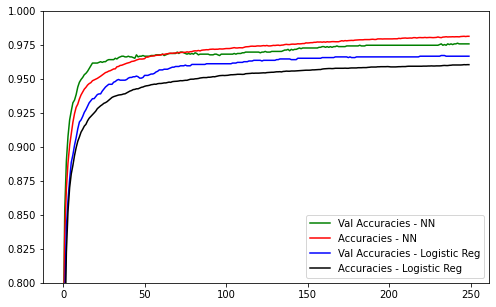

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

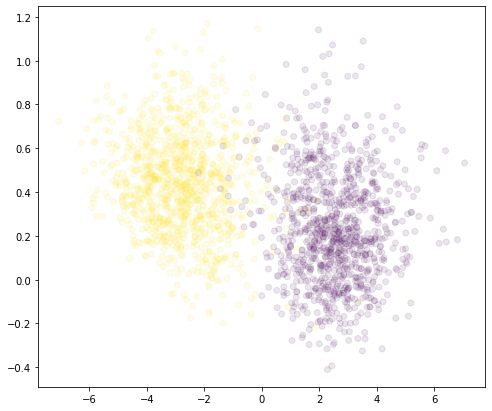

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

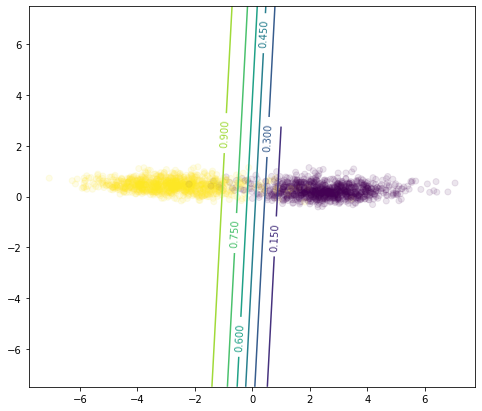

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );